In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [103]:
# Load Dataset
df = pd.read_csv('Dataset.csv')
df.columns = df.columns.str.lower().str.strip()

In [104]:
# Data Overview
df.columns = df.columns.str.lower().str.strip()
print("Data Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB
None

Summary Statistics:
          instant            hr       weekd

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [106]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')


In [107]:
df.drop(['casual', 'registered'], axis=1, inplace=True)


In [108]:
df.replace('?' , np.nan , inplace=True)

In [109]:
df['day'] = df['dteday'].dt.day
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year
df['dayofweek'] = df['dteday'].dt.dayofweek


In [110]:
df.drop('dteday', axis=1, inplace=True)


In [111]:
numeric_cols = [
    'yr','mnth','temp','atemp','hum',
    'windspeed'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [112]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [113]:
df.isna().sum()


instant       0
season        6
yr            0
mnth          0
hr            0
holiday       1
weekday       0
workingday    5
weathersit    4
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
day           0
month         0
year          0
dayofweek     0
dtype: int64

In [114]:
df.dtypes.value_counts()


float64    6
int64      4
object     4
int32      4
Name: count, dtype: int64

In [115]:
df.select_dtypes(include='object').columns


Index(['season', 'holiday', 'workingday', 'weathersit'], dtype='object')

In [116]:
df = pd.get_dummies(df, drop_first=True)


In [117]:
df.dtypes.value_counts()


bool       8
float64    6
int64      4
int32      4
Name: count, dtype: int64

In [118]:
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})


In [119]:
# Missing Values & Duplicates
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nDuplicate records:", df.duplicated().sum())


Missing values per column:
instant                   0
yr                        0
mnth                      0
hr                        0
weekday                   0
temp                      0
atemp                     0
hum                       0
windspeed                 0
cnt                       0
day                       0
month                     0
year                      0
dayofweek                 0
season_springer           0
season_summer             0
season_winter             0
holiday_Yes               0
workingday_Working Day    0
weathersit_Heavy Rain     0
weathersit_Light Snow     0
weathersit_Mist           0
dtype: int64

Duplicate records: 0


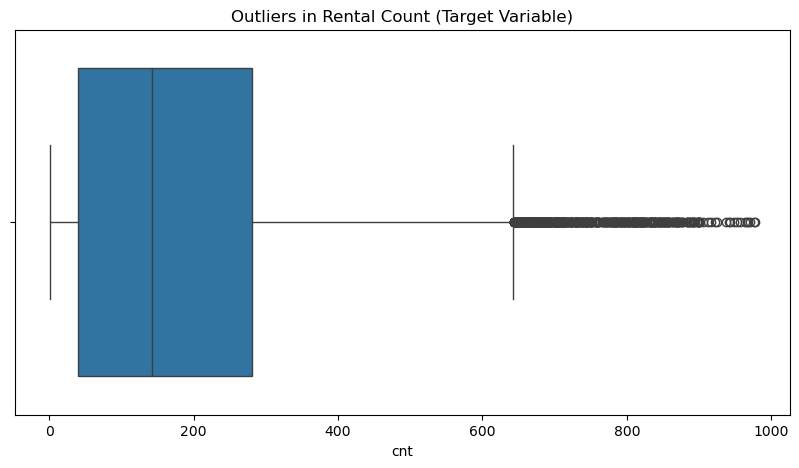

In [120]:
# Outlier Detection
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['cnt'])
plt.title('Outliers in Rental Count (Target Variable)')
plt.show()

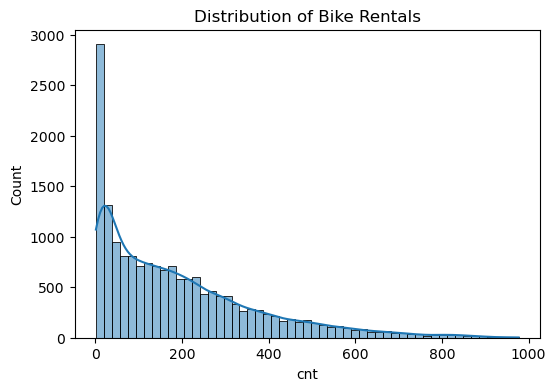

In [121]:
# Target Variable Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['cnt'], kde=True)
plt.title('Distribution of Bike Rentals')
plt.show()

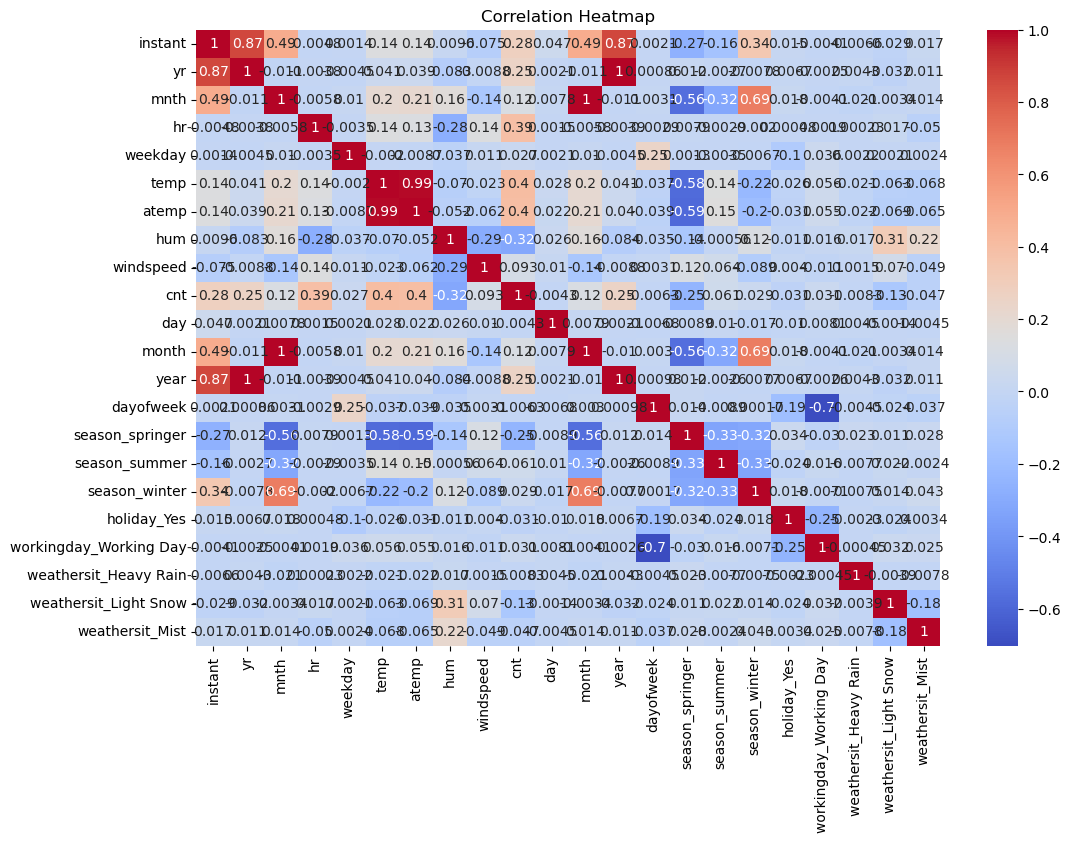

In [122]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [123]:
# Feature Scaling
scaler = StandardScaler()

numeric_features = df.drop('cnt', axis=1).select_dtypes(include=[np.number])

scaled_features = scaler.fit_transform(numeric_features)

scaled_df = pd.DataFrame(
    scaled_features,
    columns=numeric_features.columns
)

In [124]:
# Define X and y
X = scaled_df
y = df['cnt']

In [125]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [126]:
# Model Training
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [127]:
# Predictions
y_pred = lr.predict(X_test)

In [128]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 18962.09978984093
R2 Score: 0.4011731100423236


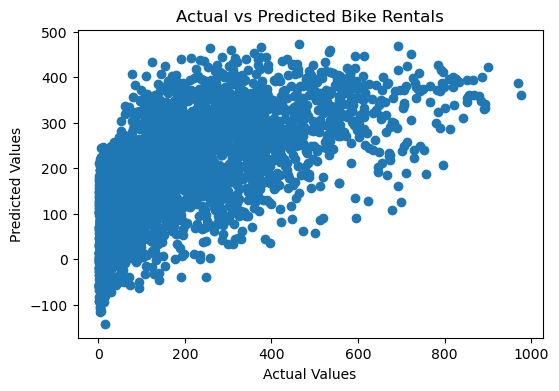

In [129]:
# Actual vs Predicted Plot
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Bike Rentals")
plt.show()

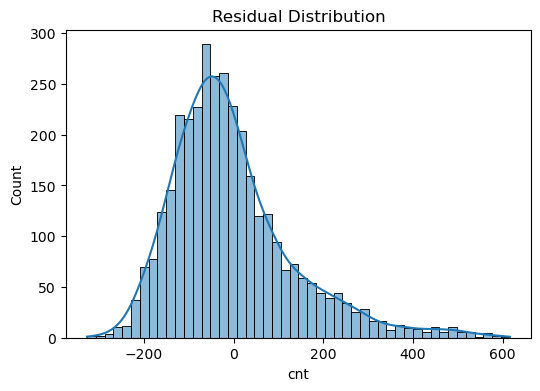

In [130]:
# Residual Distribution
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

In [131]:
# Model Coefficients
print("Model coefficients:")
for col, coef in zip(X.columns, lr.coef_):
    print(col, ":", coef)

Model coefficients:
instant : 1729.2067589032515
yr : 31.881910822729413
mnth : 25.60507373201802
hr : 49.26011935108688
weekday : 4.150486140867606
temp : 48.544609984677145
atemp : 20.969978222727487
hum : -36.732327688740604
windspeed : 3.7894831020959208
day : -73.17144505119084
month : -884.4886136123339
year : -1497.6521995325907
dayofweek : -1.6836870324450381
season_springer : 3.385086809388322
season_summer : 15.556316507621464
season_winter : 29.714164605658652
holiday_Yes : -5.270814626086485
workingday_Working Day : 0.170871863301134
weathersit_Heavy Rain : 0.49585532950417927
weathersit_Light Snow : -7.213379971718944
weathersit_Mist : 3.3621987356103213


## Model Building,Hyperparameter Tuning,Model Evaluation

## Import  Libraries

In [132]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


## Feature Selection & Train-Test Split

In [133]:
# Feature selection
X = df.drop('cnt', axis=1)   # target column
y = df['cnt']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Linear Regression (Baseline Model)

In [134]:
# Model building
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediction
y_pred_lr = lr_model.predict(X_test)

# Evaluation

print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("-" * 40)


Linear Regression
MAE: 103.51894228554426
RMSE: 137.702940381969
R2 Score: 0.40117311004234957
----------------------------------------


 ## Decision Tree Regressor (Default)

In [135]:
# Model building
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Prediction
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree (Default)")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("-" * 40)


Decision Tree (Default)
MAE: 33.69332566168009
RMSE: 58.19166478459575
R2 Score: 0.8930609233392742
----------------------------------------


## Decision Tree Regressor (Hyperparameter Tuning using GridSearchCV)

In [136]:
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}


In [137]:
dt = DecisionTreeRegressor(random_state=42)

dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [138]:
best_dt = dt_grid.best_estimator_

y_pred_dt_tuned = best_dt.predict(X_test)

print("Decision Tree (Tuned)")
print("MAE:", mean_absolute_error(y_test, y_pred_dt_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt_tuned)))
print("R2 Score:", r2_score(y_test, y_pred_dt_tuned))
print("Best Params:", dt_grid.best_params_)
print("-" * 40)


Decision Tree (Tuned)
MAE: 30.89036802411747
RMSE: 51.899635111455574
R2 Score: 0.9149364555513891
Best Params: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
----------------------------------------


## XGBoost Model  (Baseline)

In [139]:
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Regressor (Without Tuning)")
print("MAE :", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2  :", r2_score(y_test, y_pred_xgb))
print("-" * 40)


XGBoost Regressor (Without Tuning)
MAE : 23.516164779663086
RMSE: 37.507923967497355
R2  : 0.9555715918540955
----------------------------------------


## HYPERPARAMETER TUNING (GridSearchCV)

In [140]:

xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)

best_xgb_model = xgb_grid.best_estimator_

print("Best XGBoost Parameters:")
print(xgb_grid.best_params_)


Best XGBoost Parameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [141]:
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, y_pred_xgb_tuned)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))
xgb_r2 = r2_score(y_test, y_pred_xgb_tuned)

print("XGBoost Regressor (With Hyperparameter Tuning)")
print("MAE :", xgb_mae)
print("RMSE:", xgb_rmse)
print("R2  :", xgb_r2)



XGBoost Regressor (With Hyperparameter Tuning)
MAE : 21.379518508911133
RMSE: 34.558607658313576
R2  : 0.9622838497161865


## Random Forest Regressor (Default)

In [142]:
# Model building
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Prediction
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest (Default)")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("-" * 40)


Random Forest (Default)
MAE: 23.837816455696203
RMSE: 40.43341568695284
R2 Score: 0.9483707605518552
----------------------------------------


## Random Forest Regressor (Hyperparameter Tuning)

In [143]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [144]:
rf = RandomForestRegressor(random_state=42)

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [145]:
best_rf = rf_grid.best_estimator_

y_pred_rf_tuned = best_rf.predict(X_test)

print("Random Forest (Tuned)")
print("MAE:", mean_absolute_error(y_test, y_pred_rf_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned)))
print("R2 Score:", r2_score(y_test, y_pred_rf_tuned))
print("Best Params:", rf_grid.best_params_)
print("-" * 40)


Random Forest (Tuned)
MAE: 23.640696202531643
RMSE: 40.0256184877631
R2 Score: 0.9494069374843868
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
----------------------------------------


 ## Final Model Selection

In [146]:
print("Final Model Selected: Tuned Random Forest")


Final Model Selected: Tuned Random Forest


 Tuned Random Forest Regression was selected as the best model because it achieved the highest R² score and lowest RMSE compared to all other models. It effectively captured non-linear relationships and handled multicollinearity without requiring feature scaling.


 After evaluating four regression models using R² and RMSE on the test dataset, Random Forest Regression demonstrated superior performance due to its ability to capture complex patterns and reduce overfitting through ensemble learning.”



## Model Deployment

In [147]:
import pickle

In [148]:
with open('bike_rental_model.pkl','wb') as file:
    pickle.dump(best_rf,file)

In [149]:
with open("scaler.pkl","wb") as file:
    pickle.dump(scaler,file)

#### Verify if it's dump or not 

In [150]:
with open("bike_rental_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

loaded_model

RandomForestRegressor(n_estimators=200, random_state=42)

In [151]:
sample_input = X_test.iloc[[0]]
loaded_model.predict(sample_input)

array([403.015])

In [152]:
feature_columns = X_train.columns.tolist()
feature_columns

['instant',
 'yr',
 'mnth',
 'hr',
 'weekday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'day',
 'month',
 'year',
 'dayofweek',
 'season_springer',
 'season_summer',
 'season_winter',
 'holiday_Yes',
 'workingday_Working Day',
 'weathersit_Heavy Rain',
 'weathersit_Light Snow',
 'weathersit_Mist']

--------------------------------------------------------------------------------------------------------------------